In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading 'Transactiosn' sheet of the file

trans_sheet_1 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=1, skiprows=1)

trans_sheet_1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
trans_sheet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
# examining null values in the columns
trans_sheet_1.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [5]:
# examining frequency distribution of each column containing missing values

trans_sheet_1['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [6]:
# filling null values in the 'online_order' column with last valid observation to fill gap

trans_sheet_1['online_order'].fillna(method='ffill', inplace=True)

trans_sheet_1['online_order'].value_counts()

1.0    10016
0.0     9984
Name: online_order, dtype: int64

In [7]:
# examining frequency distribution of each column containing missing values

trans_sheet_1['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [8]:
trans_sheet_1['brand'].fillna(method='bfill', inplace=True)

trans_sheet_1['brand'].value_counts()

Solex             4301
Giant Bicycles    3337
WeareA2B          3329
OHM Cycles        3074
Trek Bicycles     3023
Norco Bicycles    2936
Name: brand, dtype: int64

In [9]:
trans_sheet_1['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [10]:
trans_sheet_1.product_line.fillna(method='bfill', inplace=True)

trans_sheet_1.product_line.value_counts()

Standard    14308
Road         4014
Touring      1250
Mountain      428
Name: product_line, dtype: int64

In [11]:
trans_sheet_1['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [12]:
trans_sheet_1.product_class.fillna(method='bfill', inplace=True)

trans_sheet_1.product_class.value_counts()

medium    13959
high       3038
low        3003
Name: product_class, dtype: int64

In [13]:
trans_sheet_1['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [14]:
trans_sheet_1.product_size.fillna(method='ffill', inplace=True)

trans_sheet_1.product_size.value_counts()

medium    13115
large      4022
small      2863
Name: product_size, dtype: int64

In [15]:
trans_sheet_1['standard_cost'].fillna(trans_sheet_1['standard_cost'].mean(), inplace=True)

In [16]:
trans_sheet_1['product_first_sold_date'].fillna(trans_sheet_1['product_first_sold_date'].mean(), inplace=True)

In [17]:
trans_sheet_1.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [18]:
trans_sheet_1.duplicated().any()

False

In [19]:
# reading 'NewCustomerList' sheet of the file

ncl_sheet_2 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=2, skiprows=1)

ncl_sheet_2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.52,0.650,0.8125,0.690625,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.76,0.760,0.9500,0.807500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.46,0.460,0.4600,0.460000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.78,0.975,0.9750,0.975000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.55,0.550,0.6875,0.687500,4,4,1.703125


In [20]:
ncl_sheet_2 = ncl_sheet_2.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'])
ncl_sheet_2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [21]:
ncl_sheet_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [22]:
ncl_sheet_2.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [23]:
ncl_sheet_2['last_name'] = ncl_sheet_2['last_name'].fillna(method='ffill')

In [24]:
ncl_sheet_2['DOB'] = ncl_sheet_2['DOB'].fillna(method='ffill')

In [25]:
ncl_sheet_2['job_title'].value_counts()

Associate Professor            15
Software Consultant            14
Environmental Tech             14
Chief Design Engineer          13
Assistant Media Planner        12
                               ..
Computer Systems Analyst II     1
Accounting Assistant III        1
Accounting Assistant IV         1
Database Administrator I        1
Office Assistant I              1
Name: job_title, Length: 184, dtype: int64

In [26]:
ncl_sheet_2['job_title'].fillna(method='bfill', inplace=True)

In [27]:
ncl_sheet_2['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [28]:
ncl_sheet_2['job_industry_category'].fillna(method='bfill',inplace=True)

In [29]:
ncl_sheet_2.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [30]:
ncl_sheet_2.duplicated().any()

False

In [31]:
# reading 'CustomerDemographic' sheet of the file

cd_sheet_3 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=3, skiprows=1)

cd_sheet_3.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [32]:
del cd_sheet_3['default']

In [33]:
cd_sheet_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [34]:
cd_sheet_3.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [35]:
cd_sheet_3['last_name'].fillna(method='ffill', inplace=True)

In [36]:
cd_sheet_3['DOB'].fillna(method='ffill', inplace=True)

In [37]:
cd_sheet_3['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Programmer Analyst IV                    4
Research Assistant III                   3
Health Coach I                           3
Health Coach III                         3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [38]:
cd_sheet_3['job_title'].fillna(method='bfill', inplace=True)

In [39]:
cd_sheet_3['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [40]:
cd_sheet_3['job_industry_category'].fillna(method='ffill', inplace=True)

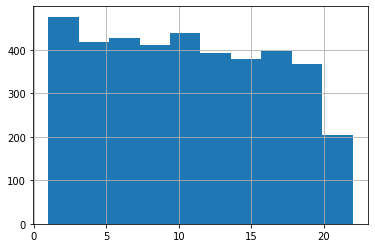

In [41]:
cd_sheet_3.tenure.hist()

In [42]:
cd_sheet_3.tenure.mean()

10.65704063378482

In [43]:
cd_sheet_3.tenure.fillna(cd_sheet_3.tenure.mean(), inplace=True)

In [44]:
cd_sheet_3.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [45]:
cd_sheet_3.duplicated().any()

False

In [46]:
# reading 'CustomerAddress' sheet of the file

ca_sheet_4 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=4, skiprows=1)

ca_sheet_4.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [47]:
ca_sheet_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [48]:
ca_sheet_4.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [49]:
ca_sheet_4.duplicated().any()

False

In [50]:
# appending edited sheets to an existing file 'KPMG_VI_New_raw_data_update_final.xlsx'

sheet1 = trans_sheet_1.copy()
sheet2 = ncl_sheet_2.copy()
sheet3 = cd_sheet_3.copy()
sheet4 = ca_sheet_4.copy()

with pd.ExcelWriter('KPMG_VI_New_raw_data_update_final.xlsx', engine='xlsxwriter') as writer:
    sheet1.to_excel(writer, sheet_name='Transactions_Edited')
    sheet2.to_excel(writer, sheet_name='NewCustomerList_Edited')
    sheet3.to_excel(writer, sheet_name='CustomerDemographic_Edited')
    sheet4.to_excel(writer, sheet_name='CustomerAddress_Edited')

In [51]:
# verifying the file

verification = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=None, index_col=0)

verification['Transactions_Edited']

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [52]:
verification['NewCustomerList_Edited']

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000


In [53]:
verification['CustomerDemographic_Edited']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.000000
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.000000
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.000000
3,4,Talbot,Dearle,Male,33,1961-10-03,Senior Editor,IT,Mass Customer,N,No,7.000000
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,N,Yes,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.000000
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.000000
3997,3998,Sarene,Woolley,U,60,2001-07-13,Assistant Manager,IT,High Net Worth,N,No,10.657041
3998,3999,Patrizius,Woolley,Male,11,1973-10-24,Software Engineer IV,Manufacturing,Affluent Customer,N,Yes,10.000000


In [54]:
verification['CustomerAddress_Edited']

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7
